In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import resfuncRead as rfr
from scipy.stats import kde
from data_check import *
from Band_plots import *
from ER_Yield import Yield_Er
from NR_Yield import Yield_Nr
from bin_data_check import * 
from Dist_check import *  
from Data_check_continuous import * 




In [2]:
N = 100000
s = 1
fano = 0 # 'known' fano factor for electron recoils. 

bins = np.array([10,13.4,18.1,24.5,33.1,44.8,60.6,80.2,110])

bins_cont = np.linspace(10,150,10000)
Eer = np.random.choice(bins,N)

df = Yield_Er(Eer,fano) #Electron Recoil Band with fano

df_count = Yield_Er(bins_cont,fano) #with fano 

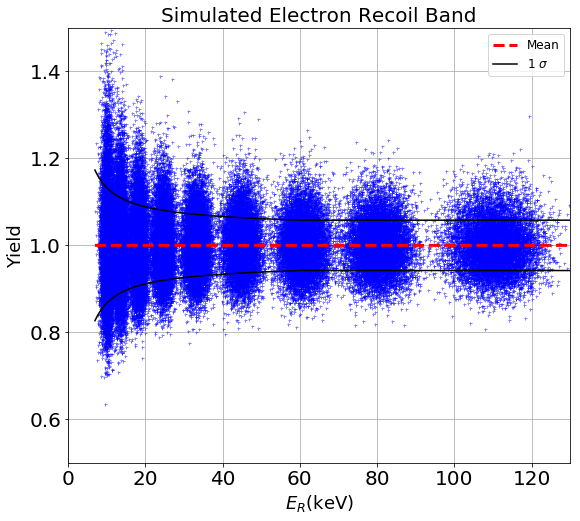

My program took 0.539484977722168  seconds to run


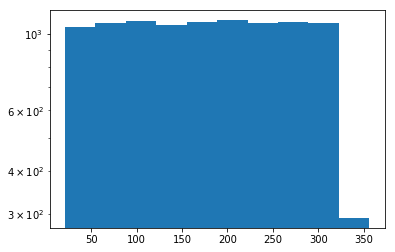

In [3]:
#NR_band_plot(df)

ER_band_plot(df,N)  


#hist_plot_simple(df_count.EQ_smear,'Eq')
plt.hist(df_count.EP_smear)
plt.yscale('log')
plt.show()



In [4]:
expected,Er_true,y,z = continuous_containment(df_count,s,band_er)

331.81818181818187 150.0 7.476581130964807 1.6309092555994649 0.9421090749431437 1.0578909250568562


4.011401877630635


(array([  46.,  282.,  975., 2250., 2892., 2290.,  967.,  258.,   37.,
           3.]), array([163.30148133, 166.34570651, 169.38993169, 172.43415687,
        175.47838205, 178.52260723, 181.56683241, 184.6110576 ,
        187.65528278, 190.69950796, 193.74373314]), <a list of 10 Patch objects>)

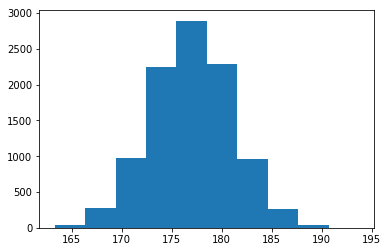

In [5]:
sig = np.mean(df_count.sigp_mean)
mean = np.mean(df_count.EP_smear)

s = np.random.normal(mean,sig,10000)

print(sig)
plt.hist(s)


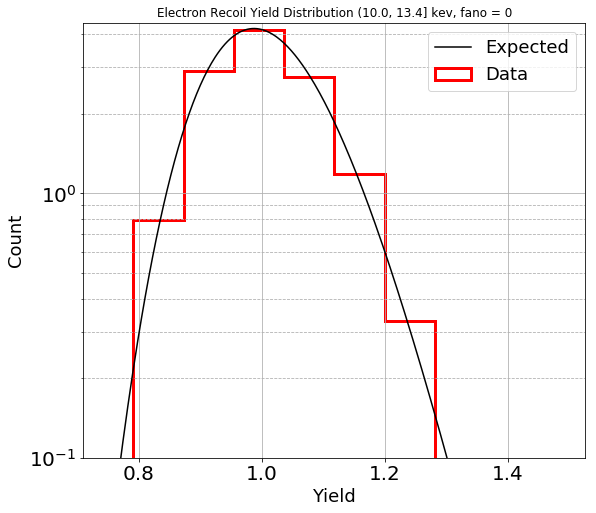

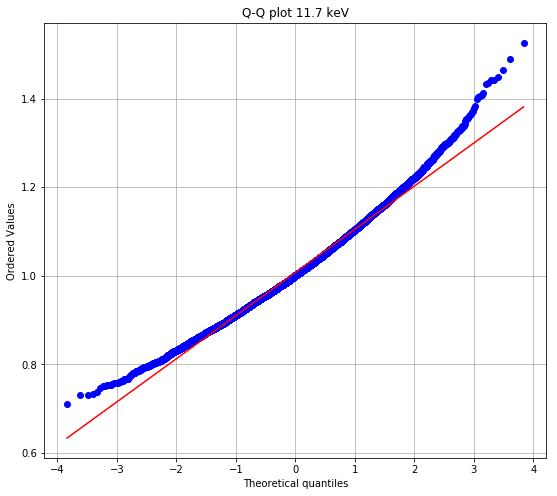

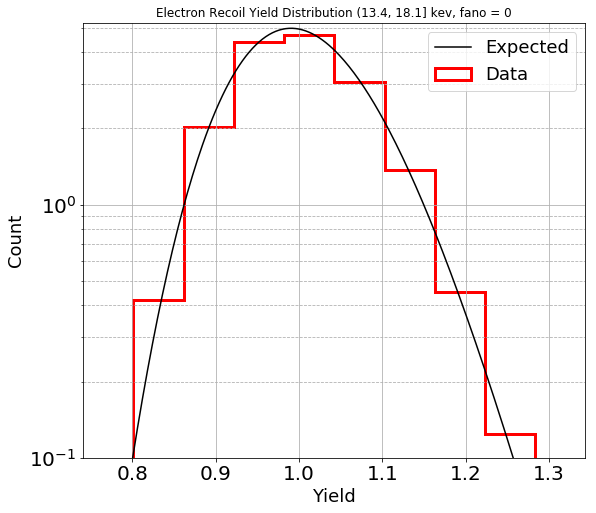

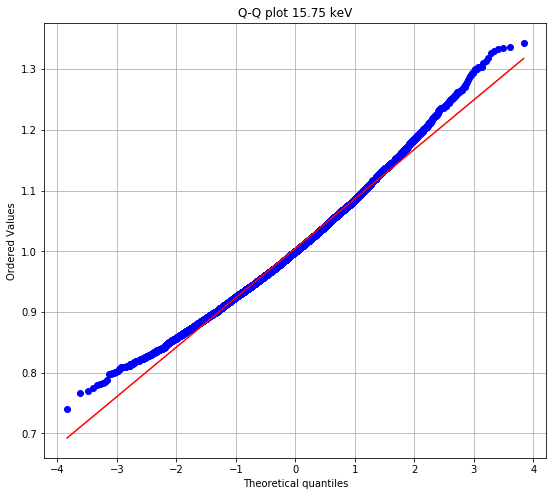

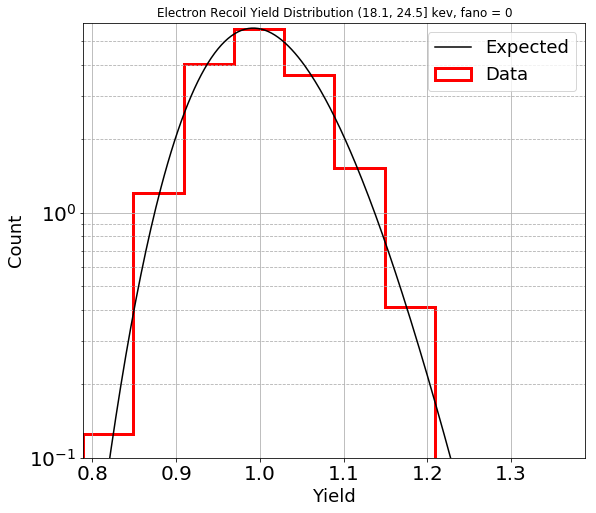

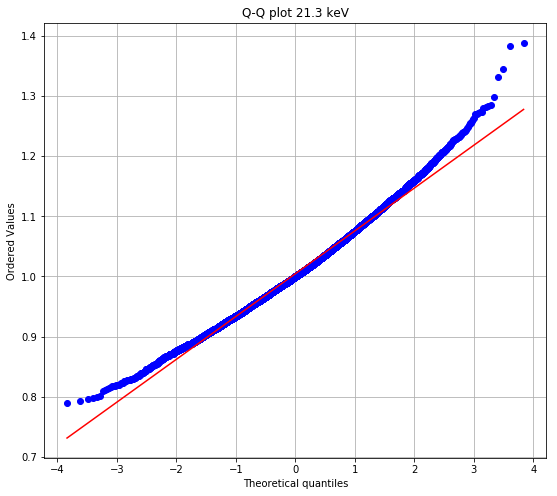

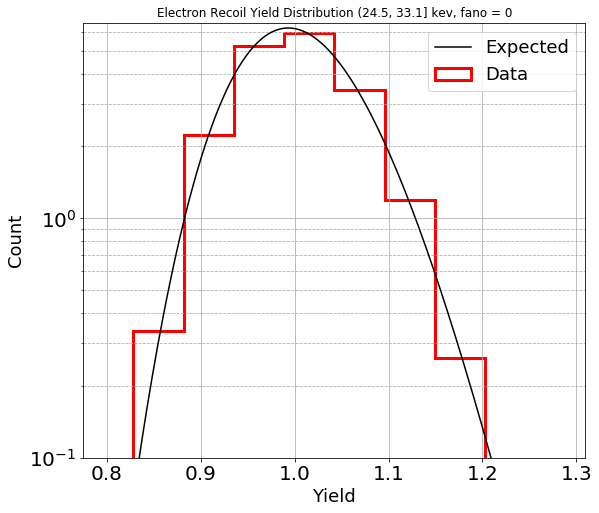

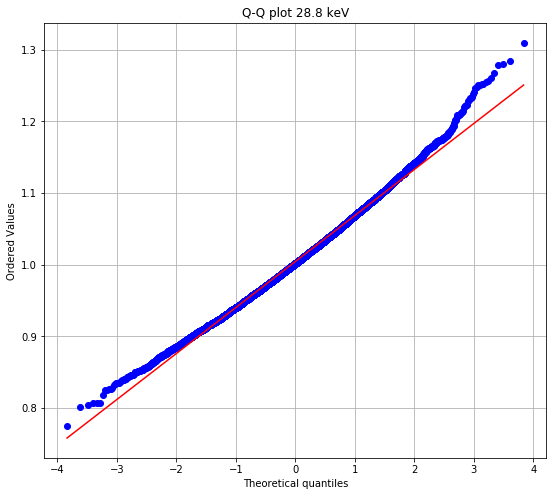

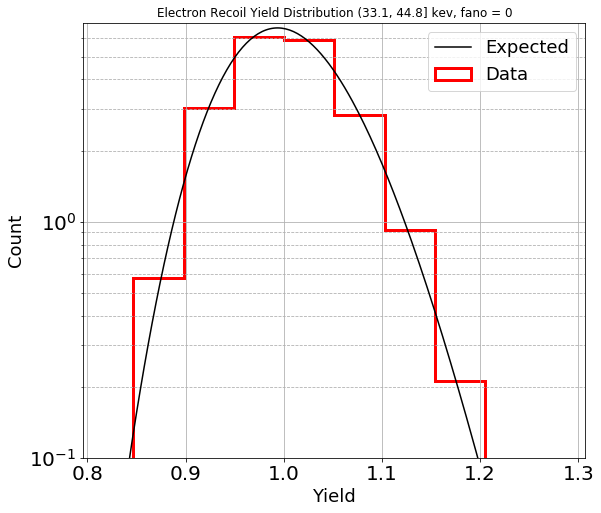

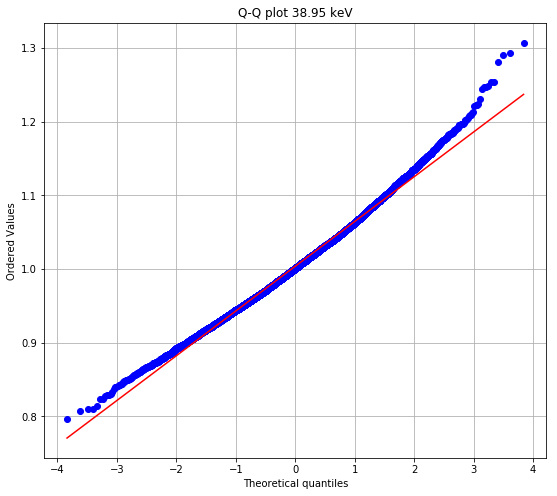

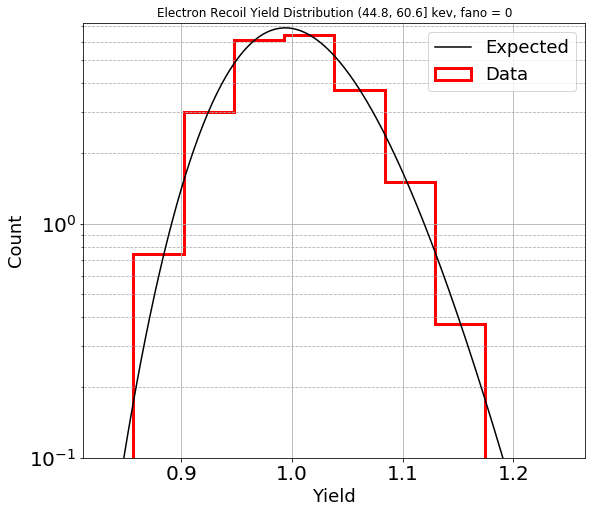

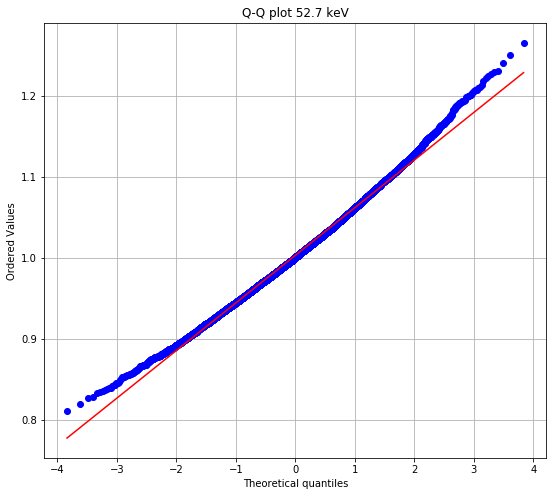

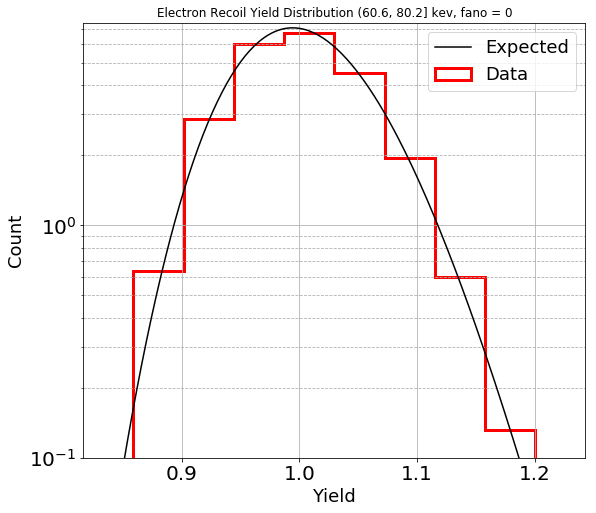

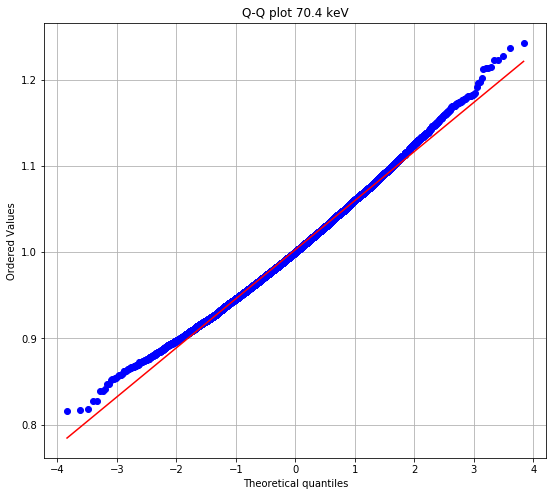

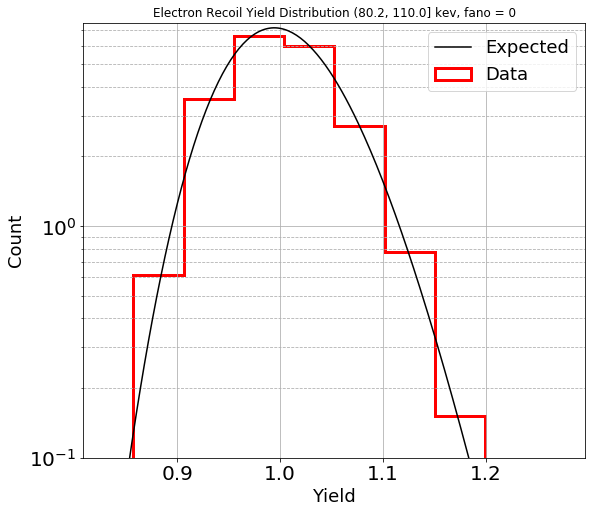

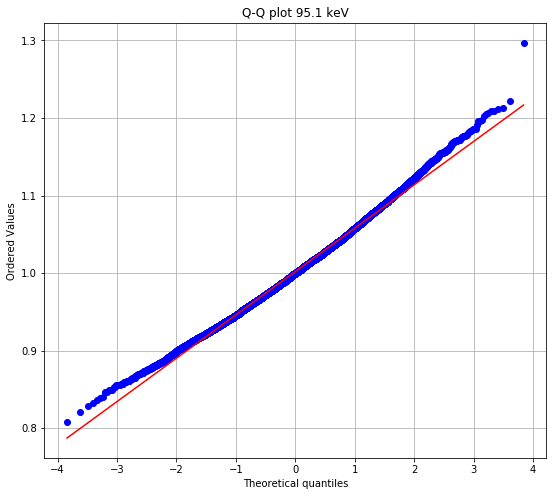

--------------------------------------------
1 SIGMA ELECTRON RECOIL BAND
--------------------------------------------
Bin Spacing (keV) 	 Percent in band 	 Expected 	 	 Percent from high 	 Percent from low
-------------- 	 	------------------- 	------------------- 	------------------- 	-------------------
(10.0, 13.4] 	 	 74.97 	 ± 0.41 % 	 75.06 	 	 	 71.12 	 ± 0.67 	 78.82 	 ± 0.59
(13.4, 18.1] 	 	 75.37 	 ± 0.41 % 	 75.19 	 	 	 72.10 	 ± 0.66 	 78.63 	 ± 0.59
(18.1, 24.5] 	 	 74.73 	 ± 0.41 % 	 74.51 	 	 	 71.00 	 ± 0.67 	 78.46 	 ± 0.59
(24.5, 33.1] 	 	 73.23 	 ± 0.42 % 	 72.98 	 	 	 70.00 	 ± 0.68 	 76.47 	 ± 0.61
(33.1, 44.8] 	 	 71.56 	 ± 0.43 % 	 70.69 	 	 	 68.62 	 ± 0.69 	 74.50 	 ± 0.63
(44.8, 60.6] 	 	 68.19 	 ± 0.44 % 	 68.01 	 	 	 65.75 	 ± 0.72 	 70.63 	 ± 0.67
(60.6, 80.2] 	 	 69.13 	 ± 0.44 % 	 69.17 	 	 	 66.43 	 ± 0.71 	 71.83 	 ± 0.66
(80.2, 110.0] 	 	 69.81 	 ± 0.43 % 	 70.00 	 	 	 68.36 	 ± 0.69 	 71.26 	 ± 0.66
--------------------------------------------


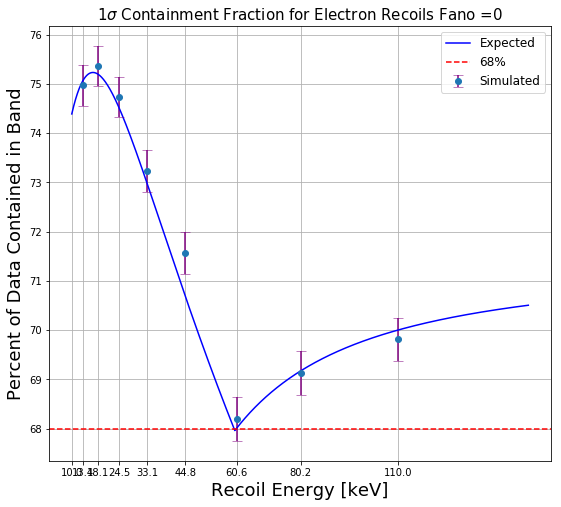

In [6]:

cut_idx = 'E_true' # True energy
#cut_idx = 'E_measured' # Measured Energy

df,bincenters = bin_check(df,1,band_er,bins,cut_idx,expected,Er_true,fano)#For electron Recoils with fano factor 


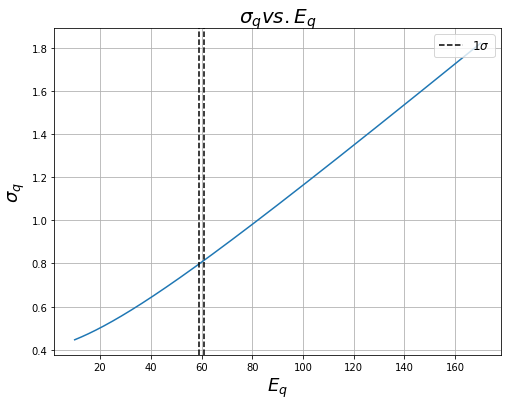

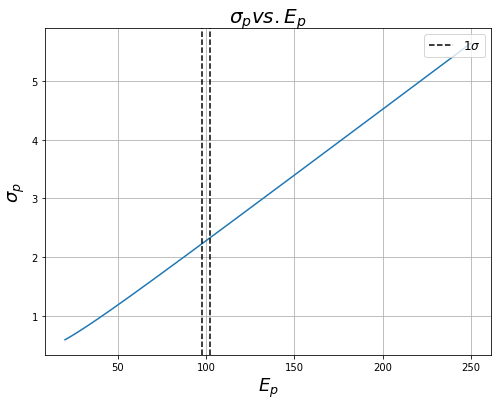

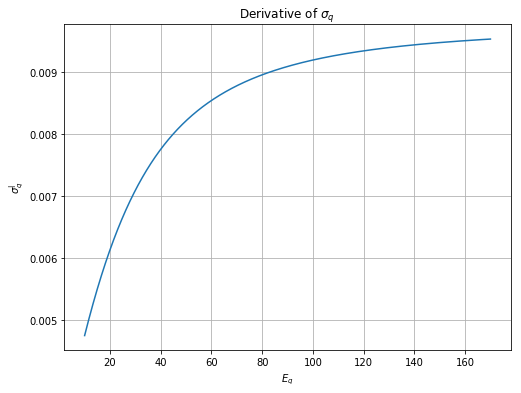

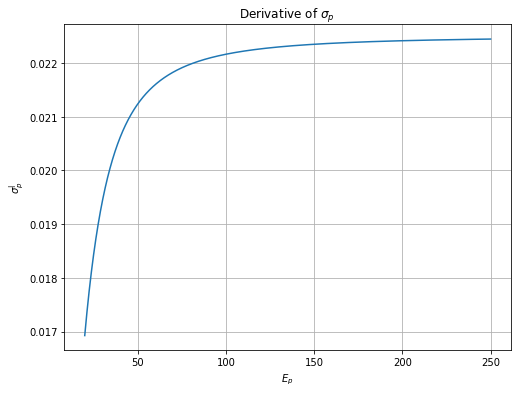

In [7]:
p_alpha = 0.155393
p_beta = 9.60343*10**(-11)
p_gamma = 0.000506287
q_alpha = 0.166004
q_beta = 0.0023371
q_gamma = 9.52576*10**(-5)


def sigmaq(Eq):
    return np.sqrt(q_alpha + q_beta*Eq + q_gamma*(Eq**2))
def sigq_der(Eq):
    return 0.5*np.power(q_alpha + q_beta*Eq + q_gamma*(Eq**2),-0.5)*(q_beta + 2*q_gamma*(Eq))

def sigmap(Ep):
    return np.sqrt(p_alpha + p_beta*Ep + p_gamma*(Ep**2))
def sigp_der(Ep):
    return 0.5*np.power(p_alpha + p_beta*Ep + p_gamma*(Ep**2),-0.5)*(p_beta + 2*p_gamma*(Ep))

Eq = np.linspace(10,170,10000)
Ep = np.linspace(20,250,10000)





plt.figure(figsize=(8, 6))
plt.plot(Eq,sigmaq(Eq))
plt.axvline(x = 60+sigmaq(60),color = 'black',linestyle = '--',label = '$1\sigma$')
plt.axvline(x = 60-sigmaq(60), color = 'black',linestyle = '--')
plt.title('$\sigma_q vs. E_q$',size = '20')
plt.xlabel('$E_q$',size = '18')
#plt.xscale('log')
plt.ylabel('$\sigma_q$',size = '18')
plt.legend(loc=1,prop={'size':12})
plt.grid(True)

plt.figure(figsize=(8, 6))
plt.plot(Ep,sigmap(Ep))
plt.axvline(x = 100+sigmap(100),color = 'black',linestyle = '--',label = '$1\sigma$')
plt.axvline(x = 100-sigmap(100), color = 'black',linestyle = '--')
plt.title('$\sigma_p  vs. E_p$',size = 20 )
plt.xlabel('$E_p$',size = '18')
#plt.xscale('log')
plt.ylabel('$\sigma_p$',size = '18')
plt.legend(loc=1,prop={'size':12})
plt.grid(True)



plt.figure(figsize=(8, 6))
plt.plot(Eq,sigq_der(Eq))
plt.title("Derivative of $\sigma_q$ ")
plt.ylabel('$\sigma_q^|$')
plt.xlabel('$E_q$')
plt.grid(True)

plt.figure(figsize=(8, 6))
plt.plot(Ep,sigp_der(Ep))
plt.title("Derivative of $\sigma_p$ ")
plt.ylabel('$\sigma_p^|$')
plt.xlabel('$E_p$')
plt.grid(True)

plt.show()